In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Semi-Simple Statistics - Variance and Standard Deviation

We'll take a look at some measures of dispersion here - or how spread out is our data. 
Are all of our values closely grouped together, or are they spread all over the place?

We'll consider two sets of data here: the height of NBA players and the height of NFL players. 
Think about what we can know going in... hint: there's some really, really tall basketball players.

In [2]:
#Import the two datasets
dfNBA = pd.read_csv("data/NBA.csv")
dfNBA.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [3]:
#Import the two datasets
dfNFL = pd.read_csv("data/NFL.csv")
dfNFL.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


### Gentle Intro to Numpy

Numpy is another common library that we'll use quite a bit, it provides the data structure of an array, which will be much more useful later on. 

Here, we'll use several functions from numpy. Take a look at the "mean" function below - it does the exact same thing as the mean we used previously, the difference is that this one comes from the numpy package and the one we used last time comes from the pandas package. This does lead us into one common thing that can be confusing when we first start programming - where to put the function. 

If you recall from before, we got the mean by typing:
<ul>
<li> df["Height"].mean()
<li> Whereas now we are seeing...
<li> np.mean(df["Height"])
</ul>

These two thing do the same thing, but they do it in different ways. Why?

In the first example, the ones we used last time, the "mean" function is "part of" the pandas library, i.e. it is literally a piece of code somewhere inside of the pandas files we are importing. More specifically, the mean function is (for lack of a better term) "in" the dataframe object. This will make more sense later on, but when you create objects (classes) when programming you can build them to store data (such as the dataframe sheet); you can also build them to have functionality - that is what the mean function, and the head function, etc... are. Because we are using something that is part of the dataframe object, we "call it on" that object, or

> data_frame_object.Function_in_the_object_to_run(arguments)

With the numpy ones we have here today it is a little different, we are using the mean function from numpy, which is not part of a dataframe. We are feeding it a dataframe as an input. So to call it we say...

> library_name.which_function(data_to_use)

The part before the period is where to look for the function, in the first it looks in the dataframe object, in the second it looks inside the numpy library. The part after the period is the function to find, in our case they are both the mean function. The arguments are additional data (or settings), for the first one we don't need anything else, as the function call already "has" the dataframe; in the numpy one we are calling a generic function, so in the argument we need to provide the data for it to use. This numpy function can do its mean calculation with many different types of inputs, so we can plug in a dataframe column, a series, an array, a list, etc... while still using one function.

This concept is very common and we'll get used to it over time. As well, having a million ways to do things is very common - in this case using either is fine, but it can be easy to get mixed up, especially when you start, as you can see a million ways to do things. 

### Data Cleanup

We should look at the data initially to see if there is anything that we need to "clean". Cleaning data is a common step that we always need to take, to some degree. 



Note: the "str" functions that you see down below just force values to be strings (text). 

In [4]:
#Take the height column
nba = dfNBA["Height"]
nfl = dfNFL["Height (inches)"]

#Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

#### Pandas Series
We are also slicing out the individual columns we care about from the rest of the dataframe. In pandas-speak, this "one column dataframe" is called a series. We can treat it pretty much just like a dataframe, except we don't need to specify columns since there is only one. 

For most things our data can be in any type of data structure - a dataframe, series, array, list, etc - and we can deal with it in a largely interchangable way. Which we choose is determined by any other restrictions that need a certain type of data (we'll see this later), whatever is easier, or our preference. At the end of the day we can transfer data between data structures as we please, so whatever you are more comfortable with is OK.

In [5]:
print(type(dfNBA))
print(type(nba))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
nba.head()

0    185.0
1    180.0
2    202.5
3    205.0
4    205.0
Name: Height, dtype: float64

<b>Examples of the mean calculations from above.</b>

In [7]:
print("With pandas mean:")
print("NBA Mean Height: "+str(nba.mean()))
print("NFL Mean Height: "+str(nfl.mean()))

print("\n")
print("With numpy mean:")
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

With pandas mean:
NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


With numpy mean:
NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


Well that's not great. NBA players probably aren't 2.5 times taller than NFL players!!

We need to correct between inches and cm. We're metric people, so we'll make the NFLers into cm. 

There are lots of ways to do this. It is called mapping a function, or applying a function to every value, because ours is very simple, this shortcut works. The syntax of doing this with more complex functions can get very confusing, so internet examples might be complex.

Note: if we need to do something repetitive over and over, there is almost always a way to automate it. This is a great spot to Google, as the way to do things like this can vary depending on our data. 

In [8]:
# Convert to cm
nfl = nfl*2.54

Alright, try again...

In [9]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 186.71133325500546


Use the cell below and determine the range of both the datasets. 

In [10]:
#Determine ranges
print("NBA Range: ", str(np.min(nba)), str(np.max(nba)) )
print("NFL Range: ", str(np.min(nfl)), str(np.max(nfl)) )

NBA Range:  172.5 222.5
NFL Range:  154.94 208.28


Before moving on, we can use describe to get our basic stats in bulk. 

In [11]:
nba.describe()

count    422.000000
mean     197.440758
std        8.740250
min      172.500000
25%      190.000000
50%      197.500000
75%      205.000000
max      222.500000
Name: Height, dtype: float64

In [12]:
nfl.describe()

count    17026.000000
mean       186.711333
std          6.547186
min        154.940000
25%        182.880000
50%        187.960000
75%        190.500000
max        208.280000
Name: Height (inches), dtype: float64

At a glance, there don't seem to be any big issues to worry about:
<ul>
<li> There are no outliers that raise an alarm - no one is 8'4". 
<li> The ranges seem realistic. 
<li> We have about 400 and 17000 records for the datasets, so we aren't dealing with a dataset with like 4 values or something. 
<li> It appears that the NFL players are shorter and have less of a spread in height, which matches my initial observations. 
</ul>

<b> This looks reasonable. Our data appears to be mostly cleaned up, so we can start analyzing it.</b>

### Visualize Distributions

The averages, shown in cm, are around 6'6" for the NBA, and 6'1" for the NFL - this makes some sense, NBA players are often really tall

We can picture the distribution of heights with some histograms... We'll do more histogram and visualization stuff next time. 

In [13]:
nbahist = thinkstats2.Hist(nba, label='NBA Height')
nflhist = thinkstats2.Hist(nfl, label='NFL Height')

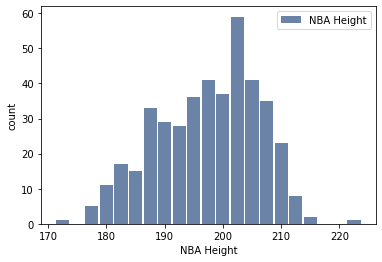

In [14]:
thinkplot.Hist(nbahist)
thinkplot.Config(xlabel='NBA Height', ylabel='count')

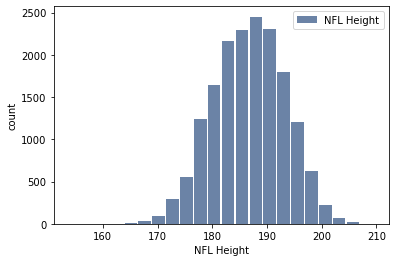

In [15]:
thinkplot.Hist(nflhist)
thinkplot.Config(xlabel='NFL Height', ylabel='count')

Both of the distributions look normal-ish (bell shaped), which is very common and makes some analysis easier. As we suspected with the numbers the NBA distribution is more spread out. 

If you know sports - what might be the reason for the big spike in the NBA distribution. 

We can also overlay the distributions for comparison...

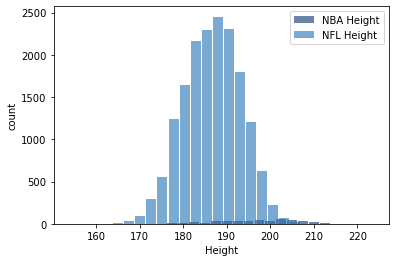

In [16]:
thinkplot.Hist(nbahist)
thinkplot.Hist(nflhist)
thinkplot.Config(xlabel='Height', ylabel='count')

What happened??? There are way fewer NBA records, so the counts are lower. We have ways to deal with this, stay tuned for density. 

### Dispersion - Variance

Now lets get down to business, which set of heights is more spread? Does this jive with reality (if you're a sports fan)?

We can measure this, one measure is the Variance. The varaince formula is in the text, it is basically how far each value is from the mean, squared. Why squared...???????

Luckily, we don't need to do the math, we have simple functions to do it for us. 

In [17]:
np.var(nba)

76.21094539655442

In [18]:
np.var(nfl)

42.863124981504704

The higher the variance, the larger the average distance from the mean for each value is. So high variances indicate that the data is very spread out; low variances indicate that data is very compact. In our data the NBA heights have a higher variance than the NFL, so that tells us that the heights of NBA players is more spread out than NFL players. 

If we add in some domain knowledge, i.e. watch some sports, that should make sense to us - there are a bunch of NBA players under 6ft, and a bunch over 7ft. 

#### Standard Deviation

Another measure of dispersion is the Standard Deviation - the square root of the Variance.

The standard deviation is normally used with normal distributions. If you remember all the z-score stuff from high school, that comes from this. When we are discussing dispersion the standard deviation is often more usable as it is on the same scale as the original data - the variance squares, the standard deviation takes it away. 

We can think back to some of that z-score stuff to picture exactly what the standard deviation shows - it tells us what share of values will be within X standard deviations of the mean. In a perfect normal distribution, ~68% of the results lie within 1 standard deviation of the mean, so with our data we can see that the 68% of NBA players are spread over a range of about 17.5cm (from -1 std to +1 std) centered at 197cm. With the NFL players those people are spread over a range of about 13cm. Intuitively this makes sense as there are way more basketball players that range into really large heights. 

<ul>
<li>"The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean."
</ul>

So we can expect about 68% of players to be between ~189 and ~206cm, about 95% to be between ~180 and ~215cm, and about 99.7% between ~171 and ~223cm - or about 7'3"!!! This is assuming that our data is normal though - if you look at the two datasets, do you see any issues with that? <b>The closer our data is to a true normal distribution, the more accurate these estimates will be - this concept will become important in a few weeks.</b>

The standard deviation is generally more useful, and more commonly used, than the variance.

In [19]:
np.std(nba)

8.729888051776747

In [20]:
np.std(nfl)

6.546993583432376

#### Medians and Typical Values

The median is one of our other "averages", representing the value in the middle - with 50% of other values falling above, and 50% falling below. The median is very commonly useful in real-world, population based measures such as income. The median is less impacted by outliers than the mean, so in a situation where there are a few billionaires with massive incomes dragging up the mean, the median will not follow much. In cases such as this the median is a better representitive of an "average example". 

The more normal (term of art - more on normality later) data is, the closer the mean and the median will be; the more skewed the data, the farther apart. 

In [21]:
print("NBA Median:", np.median(nba))
print("NFL Median:", np.median(nfl))

NBA Median: 197.5
NFL Median: 187.96


##### Ranges and Values

One other usefull thing to know, is what's a 'typical' value. One way we can determine that is by measuring something called the interquartile range (IQF) - fancy term for the difference between the 25th percentile and the 75 percentile. Could this be useful for something like measuring income? 

In [22]:
nba.describe()

count    422.000000
mean     197.440758
std        8.740250
min      172.500000
25%      190.000000
50%      197.500000
75%      205.000000
max      222.500000
Name: Height, dtype: float64

In [23]:
nfl.describe()

count    17026.000000
mean       186.711333
std          6.547186
min        154.940000
25%        182.880000
50%        187.960000
75%        190.500000
max        208.280000
Name: Height (inches), dtype: float64

In this example the IQR is the range between the 25th percentile and the 75th percentile. It tells us the range of the middle 50% of records. So half of the NFL players are between about 183 and 190 cm, a range of only about 7 or 8 cm. The NBA IQR is from about 190 to 205, or about 15 cm. So the "middle height" players in the NBA are spread over a much wider range. 

This IQR is common in social-science types of analysis - the data is often imperfect and incomplete, but the IQR can give us a good and reliable metric for the "typical person" without much calculation. 

## Probability Mass Functions

There's another tool we can use to examine some distributions, a probability mass function (PMF). PMFs largely provide the same functionality as histograms, but they show probability instead of total count. E.g. for our example a histogram would show how many NBA players are 205cm tall, a PMF woudl show the probability a NBA player is 205cm tall. This is especially usefull when we have different total numbers. To demonstrate, try putting both the NBA and NFL histograms on one chart...

tl;dr the PMF is a histogram that plots that percentage or records, rather than the count of records. 

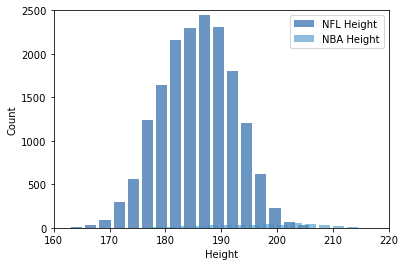

In [24]:
#Create the dual histogram
width = 2
thinkplot.PrePlot(2)
thinkplot.Hist(nflhist, align="right", width=width)
thinkplot.Hist(nbahist, align="left", width=width)
thinkplot.Config(xlabel='Height', ylabel='Count', xlim=[160, 220], ylim=[0,2500])

<b>PMF charts allow us a more convinients way to look at this data, especially when we have a lot of data. </b>

PMFs can be created easily through one of the thinkstats helpers, similar to a histogram. 

In [25]:
#Create PMFs
nbapmf = thinkstats2.Pmf(nba)
nflpmf = thinkstats2.Pmf(nfl)

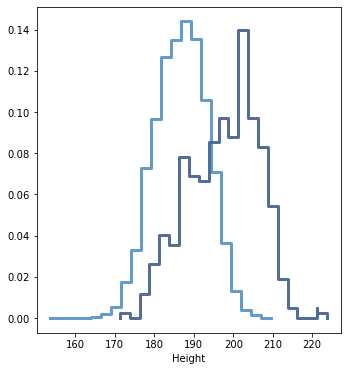

<Figure size 576x432 with 0 Axes>

In [26]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([nbapmf,nflpmf])
#thinkplot.Show(xlabel="Height (cm)", ylabel = "Percentage")
thinkplot.Show(xlabel="Height")

This graph is probably more useable, especially if we are using this data to try to draw conclusions or make predictions (which is the eventual point for all of this). For example, a glance at this chart tells us that about 15% of NBA players are ~205cm tall.

If you're familiar with some calculus, you'd integrate this PMF to get the probability within any range (though this depends on having an analytical distribution, or one defined by a mathmatical function)

## Try It

Do a similar analysis for the weights:
<ul>
<li> Load the data into two series (or another data structure, if prefered).
<li> Clean and prep data for analysis. 
<li> Generate the basic statistics. 
<li> Generate visualizations of the distributions. 
<li> Draw basic conclusions comparing the two, include at least averages, outliers, and spread. 
</ul>

##### Load Data into Data Structure

In [27]:
#Take the height column
nbaw = dfNBA["Weight"]
nflw = dfNFL["Weight (lbs)"]

In [28]:
nbaw.head()

0     81.45
1     72.45
2     99.00
3    106.65
4    110.25
Name: Weight, dtype: float64

In [29]:
nflw.head()

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
Name: Weight (lbs), dtype: float64

##### Clean and Prep

Basic prep of data - look for blanks and outliers. 

Looks like we have pounds vs kilograms, similar to last time. We need to convert one, I'll take Murica's game and make it KG. 

In [30]:
nflw = nflw/2.205

In [31]:
#Dump the non-numbers
nbaw = nbaw[~np.isnan(nbaw)]
nflw = nflw[~np.isnan(nflw)]

##### Get Basic Stats

Describe or mean, var, etc...

In [32]:
nflw.describe()

count    17121.000000
mean       103.954950
std         19.379924
min          0.453515
25%         88.435374
50%         99.773243
75%        115.646259
max        170.068027
Name: Weight (lbs), dtype: float64

In [33]:
nbaw.describe()

count    422.000000
mean      99.469194
std       12.364228
min       72.450000
25%       90.000000
50%       99.000000
75%      108.000000
max      162.000000
Name: Weight, dtype: float64

A min weight for the NBA of 72kg sounds ok, but 1kg for NFL is clearly wrong. We should filter out any unrealistic values. I'm going to filter out people less than 70kg - roughly 160lb. 

In [34]:
nflw = nflw.loc[lambda x : x>=70]
nflw.describe()

count    17072.000000
mean       104.151578
std         18.974298
min         70.294785
25%         88.888889
50%         99.773243
75%        115.646259
max        170.068027
Name: Weight (lbs), dtype: float64

Rounding

In [43]:
nflw=round(nflw)
nflw.describe()

count    17072.000000
mean       104.182873
std         19.151042
min         70.000000
25%         90.000000
50%        100.000000
75%        120.000000
max        170.000000
Name: Weight (lbs), dtype: float64

##### Visualize

I'm going to skip histograms and go straight to PMFs

Note: The rounding here is just to make it display a bit better. For our purposes 100.3kg and 100.7kg are the same value, so we don't want them separated in the graphing. 

In [35]:
#Create PMFs
nbawpmf = thinkstats2.Pmf(round(nbaw, -1))
nflwpmf = thinkstats2.Pmf(round(nflw, -1))

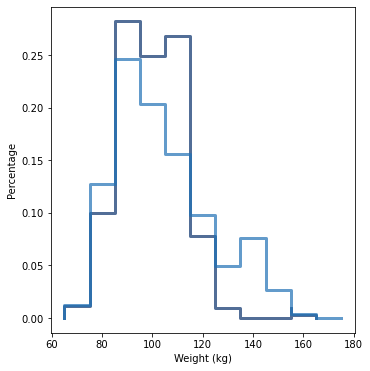

<Figure size 576x432 with 0 Axes>

In [36]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([nbawpmf,nflwpmf])
thinkplot.Show(xlabel="Weight (kg)", ylabel = "Percentage")

##### Basic Conclusions

<ul>
<li> NFL players are heavier, and more diverse in their weights. 
<li> The range of weights is mostly fairly similar between the two groups. 
<li> The NFL data has a bimodal (2 peaks) distribution - there's a big cluster of very large people. 
<li> The "middle" NBA and NFL players are similar in weights, most of the difference is in the number of very large people in the NFL. 
</ul>